In [ ]:
import pytest
from JuliaSetSecond import calculate_z_serial_purepython
class TestJuliaSet:
    def test_sum(self):
        cs, zs = self.gen_var()
        max_iterations = 300
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
        assert sum(output) == 33219980
    def gen_var(self):
        desired_width = 1000
        x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
        c_real, c_imag = -0.62772, -.42193
        """Create a list of complex coordinates (zs) and complex parameters (cs),
        build Julia set"""
        x_step = (x2 - x1) / desired_width
        y_step = (y1 - y2) / desired_width
        x = []
        y = []
        ycoord = y2
        while ycoord > y1:
            y.append(ycoord)
            ycoord += y_step
        xcoord = x1
        while xcoord < x2:
            x.append(xcoord)
            xcoord += x_step
        # build a list of coordinates and the initial condition for each cell.
        # Note that our initial condition is a constant and could easily be removed,
        # we use it to simulate a real-world scenario with several inputs to our
        # function
        zs = []
        cs = []
        for ycoord in y:
            for xcoord in x:
                zs.append(complex(xcoord, ycoord))
                cs.append(complex(c_real, c_imag))
        return cs, 
    
    
    
    

(myenv) erik@MBPsomthorErik3 Assignment 2 % pytest test_JuliaSet.py  
======================================= test session starts ========================================
platform darwin -- Python 3.11.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/erik/Desktop/Intro-to-high-performance-computing-group-11/Assignment 2
plugins: anyio-4.2.0
collected 1 item                                                                                   

test_JuliaSet.py .                                                                           [100%]

======================================== 1 passed in 2.31s =========================================

#Task 1.2: 

In [ ]:
import pytest
from JuliaSetSecond import calculate_z_serial_purepython

class TestJuliaSet:
    @pytest.mark.parametrize(
        "max_iterations, desired_width, expected_sum",
        [
            (300, 1000, 33219980),  # Example: original test case
            (200, 500, 8309980)   # Example: idk what to put to make it work
        ]
    )
    def test_sum(self, max_iterations, desired_width, expected_sum):
        cs, zs = self.gen_var(desired_width)
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
        assert sum(output) == expected_sum

    def gen_var(self, desired_width):
        x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
        c_real, c_imag = -0.62772, -0.42193

        x_step = (x2 - x1) / desired_width
        y_step = (y1 - y2) / desired_width

        x = []
        y = []

        ycoord = y2
        while ycoord > y1:
            y.append(ycoord)
            ycoord += y_step

        xcoord = x1
        while xcoord < x2:
            x.append(xcoord)
            xcoord += x_step

        zs = []
        cs = []

        for ycoord in y:
            for xcoord in x:
                zs.append(complex(xcoord, ycoord))
                cs.append(complex(c_real, c_imag))

        return cs, zs


(myenv) erik@MBPsomthorErik3 Assignment 2 % pytest test_JuliaSet.py
======================================= test session starts ========================================
platform darwin -- Python 3.11.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/erik/Desktop/Intro-to-high-performance-computing-group-11/Assignment 2
plugins: anyio-4.2.0
collected 2 items                                                                                  

test_JuliaSet.py .F                                                                          [100%]

============================================= FAILURES =============================================
______________________________ TestJuliaSet.test_sum[200-500-8309980] ______________________________

self = <test_JuliaSet.TestJuliaSet object at 0x1010788d0>, max_iterations = 200, desired_width = 500
expected_sum = 8309980

    @pytest.mark.parametrize(
        "max_iterations, desired_width, expected_sum",
        [
            (300, 1000, 33219980),  # Example: original test case
            (200, 500, 8309980)   # Example: idk what to put to make it work
        ]
    )
    def test_sum(self, max_iterations, desired_width, expected_sum):
        cs, zs = self.gen_var(desired_width)
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
>       assert sum(output) == expected_sum
E       assert 5798200 == 8309980
E        +  where 5798200 = sum([0, 0, 0, 0, 0, 0, ...])

test_JuliaSet.py:15: AssertionError
--------------------------------------- Captured stdout call ---------------------------------------
@timefn: calculate_z_serial_purepython took 0.36625333299161866 seconds
===================================== short test summary info ======================================
FAILED test_JuliaSet.py::TestJuliaSet::test_sum[200-500-8309980] - assert 5798200 == 8309980
=================================== 1 failed, 1 passed in 2.72s ====================================

## Exercise 3

Advantages: It lets me step through my code line by line, so I can see exactly where things go wrong. I can also inspect variables at different points, which helps a lot with figuring out unexpected behavior. It’s much faster than just printing everything out and guessing where the issue is.  

Disadvantages: The command-line interface of `pdb` isn’t beginner-friendly. Remembering all the commands took a lot of effort, and sometimes I had to restart my debugging session when I messed up. It doesn’t have a GUI, so it’s not as intuitive as visual debuggers like those in PyCharm or VS Code, where you can set breakpoints and see variable values more easily.

# Bonus Exercise

## Task B.1 

Check the code with a linter, and in case, run an auto-formatter. Produce HTML documentation running sphinx.

In [2]:
!flake8 conway_perf.py

conway_perf.py:2:10: W291 trailing whitespace
conway_perf.py:9:1: F401 'sys' imported but unused
conway_perf.py:9:11: E401 multiple imports on one line
conway_perf.py:11:1: F401 'matplotlib.pyplot as plt' imported but unused
conway_perf.py:12:1: F401 'matplotlib.animation' imported but unused
conway_perf.py:28:11: E203 whitespace before ':'
conway_perf.py:28:22: E203 whitespace before ':'
conway_perf.py:57:11: E203 whitespace before ':'
conway_perf.py:57:23: E203 whitespace before ':'


In [3]:
!black conway_perf.py


All done! ✨ 🍰 ✨
1 file left unchanged.


See docs/build/html for HTML documentation generated using sphinx

## Task B.2

The iteration is fixed to 100

Grid size: 10x10, Execution time: 0.011458 seconds
Grid size: 20x20, Execution time: 0.034747 seconds
Grid size: 30x30, Execution time: 0.068670 seconds
Grid size: 40x40, Execution time: 0.118295 seconds
Grid size: 50x50, Execution time: 0.181375 seconds
Grid size: 60x60, Execution time: 0.260119 seconds
Grid size: 70x70, Execution time: 0.351423 seconds
Grid size: 80x80, Execution time: 0.461991 seconds
Grid size: 90x90, Execution time: 0.570111 seconds
Grid size: 100x100, Execution time: 0.709126 seconds


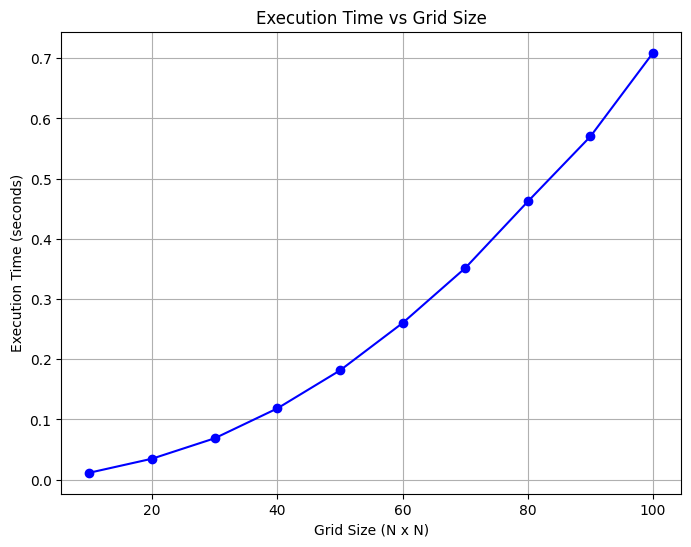

In [288]:
import subprocess
import matplotlib.pyplot as plt

def run_program(grid_size):
    command = ["python", "conway_perf.py", "--grid-size", str(grid_size), "--iterations", "100"]
    
    result = subprocess.run(command, capture_output=True, text=True)
    return result.stdout, result.stderr


iteration = 5
grid_sizes = range(10, 101, 10)
execution_times = []
for size in grid_sizes:
    stdout, stderr = run_program(size)
    if stderr:
        print("Error:", stderr)
    else:
        time_taken = float(stdout.strip().split()[-1])  # Assuming last output is execution time
        print(f"Grid size: {size}x{size}, Execution time: {time_taken:.6f} seconds")
    execution_times.append(time_taken)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(grid_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.xlabel("Grid Size (N x N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Grid Size")
plt.grid(True)
plt.show()

## Task B.3
### Before optimization

#### Total Execution Time

In [2]:
!time python3 conway_perf.py
#### Line profiler

Time:  1.557161584001733
python3 conway_perf.py  0.90s user 0.03s system 52% cpu 1.777 total


#### Line profiler

In [254]:
!python3 -m kernprof -l conway_perf.py

Time:  4.836875791996135
Wrote profile results to conway_perf.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "conway_perf.py.lprof"


In [255]:
!python3 -m line_profiler -rmt "conway_perf.py.lprof"

Timer unit: 1e-06 s

Total time: 0.005558 s
File: conway_perf.py
Function: randomGrid at line 19

Line #      Hits         Time  Per Hit   % Time  Line Contents
    19                                           @profile
    20                                           def randomGrid(N):
    21                                               """returns a grid of NxN random values"""
    22         1       5558.0   5558.0    100.0      return np.random.choice(vals, N * N, p=[0.2, 0.8]).reshape(N, N)

Total time: 2.12756 s
File: conway_perf.py
Function: update at line 59

Line #      Hits         Time  Per Hit   % Time  Line Contents
    59                                           @profile
    60                                           def update(grid, N):
    61                                               # copy grid since we require 8 neighbors for calculation
    62                                               # and we go line by line
    63       100        266.0      2.7      0.0 

In [2]:
!python3 -m memory_profiler conway_perf.py

Time:  21.738550875001238
Filename: conway_perf.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    92   85.641 MiB   85.641 MiB           1   @profile
    93                                         # main() function
    94                                         def main():
    95                                             # Command line args are in sys.argv[1], sys.argv[2] ..
    96                                             # sys.argv[0] is the script name itself and can be ignored
    97                                             # parse arguments
    98   85.672 MiB    0.031 MiB           2       parser = argparse.ArgumentParser(
    99   85.641 MiB    0.000 MiB           1           description="Runs Conway's Game of Life simulation."
   100                                             )
   101                                             # add arguments
   102   85.672 MiB    0.000 MiB           1       parser.add_argument("--grid-size", dest="N", required=Fal

#### timeit

In [152]:
!python -m timeit -n 3 -r 1 -s "import sys; sys.argv = ['conway_perf.py', '--grid-size=100']" -s "import conway_perf" "conway_perf.main()"

3 loops, best of 1: 686 msec per loop


In [153]:
!python -m timeit -n 3 -r 1 -s "import sys; sys.argv = ['conway_perf.py', '--grid-size=1000']" -s "import conway_perf" "conway_perf.main()"

3 loops, best of 1: 80.3 sec per loop


#### CProfile

In [281]:
!python -m cProfile -s cumulative conway_perf.py --grid-size=100 --iterations=100

Time:  0.723477167004603
         1181613 function calls (1164653 primitive calls) in 1.019 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    339/1    0.001    0.000    1.020    1.020 {built-in method builtins.exec}
        1    0.000    0.000    1.020    1.020 conway_perf.py:1(<module>)
        1    0.000    0.000    0.723    0.723 conway_perf.py:94(main)
      100    0.716    0.007    0.717    0.007 conway_perf.py:60(update)
       39    0.001    0.000    0.384    0.010 __init__.py:1(<module>)
    393/6    0.001    0.000    0.302    0.050 <frozen importlib._bootstrap>:1349(_find_and_load)
    389/6    0.001    0.000    0.302    0.050 <frozen importlib._bootstrap>:1304(_find_and_load_unlocked)
    375/7    0.000    0.000    0.301    0.043 <frozen importlib._bootstrap>:911(_load_unlocked)
    324/7    0.000    0.000    0.301    0.043 <frozen importlib._bootstrap_external>:989(exec_module)
   916/13    0.000    0.000    

## Task B.4
### After optimization

#### Total Execution Time

In [27]:
!time python3 conway_perf_optimize.py

Time:  0.012091041004168801
python3 conway_perf_optimize.py  0.20s user 0.02s system 98% cpu 0.226 total


#### Line profiler

In [277]:
!python3 -m kernprof -l conway_perf_optimize.py

Time:  0.015483167007914744
Wrote profile results to conway_perf_optimize.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "conway_perf_optimize.py.lprof"


In [278]:
!python3 -m line_profiler -rmt "conway_perf_optimize.py.lprof"

Timer unit: 1e-06 s

Total time: 0.004817 s
File: conway_perf_optimize.py
Function: randomGrid at line 19

Line #      Hits         Time  Per Hit   % Time  Line Contents
    19                                           @profile
    20                                           def randomGrid(N):
    21                                               """returns a grid of NxN random values"""
    22         1       4817.0   4817.0    100.0      return np.random.choice(vals, (N, N), p=[0.2, 0.8])

Total time: 0.009693 s
File: conway_perf_optimize.py
Function: update at line 59

Line #      Hits         Time  Per Hit   % Time  Line Contents
    59                                           @profile
    60                                           def update(grid, N):
    61                                               # copy grid since we require 8 neighbors for calculation
    62                                               # and we go line by line
    63       100          4.0      0.0    

In [279]:
!python3 -m memory_profiler conway_perf_optimize.py

Time:  0.101037999993423
Filename: conway_perf_optimize.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    19   86.062 MiB   86.062 MiB           1   @profile
    20                                         def randomGrid(N):
    21                                             """returns a grid of NxN random values"""
    22   88.609 MiB    2.547 MiB           1       return np.random.choice(vals, (N, N), p=[0.2, 0.8])


Filename: conway_perf_optimize.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    59   88.859 MiB 8884.828 MiB         100   @profile
    60                                         def update(grid, N):
    61                                             # copy grid since we require 8 neighbors for calculation
    62                                             # and we go line by line
    63   88.859 MiB    0.000 MiB         100       neighbors = (
    64   88.859 MiB    0.078 MiB         800           np.roll(grid, shift=1, axis=0) + 

In [280]:
!python3 -m memory_profiler conway_perf_optimize.py --grid-size 1000

Time:  1.0083106249949196
Filename: conway_perf_optimize.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    19   86.406 MiB   86.406 MiB           1   @profile
    20                                         def randomGrid(N):
    21                                             """returns a grid of NxN random values"""
    22  119.406 MiB   33.000 MiB           1       return np.random.choice(vals, (N, N), p=[0.2, 0.8])


Filename: conway_perf_optimize.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    59  217.156 MiB 20617.547 MiB         100   @profile
    60                                         def update(grid, N):
    61                                             # copy grid since we require 8 neighbors for calculation
    62                                             # and we go line by line
    63  217.156 MiB    0.000 MiB         100       neighbors = (
    64  217.156 MiB    8.594 MiB         800           np.roll(grid, shift=1, axis=0) 

#### timeit

In [218]:
!python -m timeit -n 3 -r 1 -s "import sys; sys.argv = ['conway_perf_optimize.py', '--grid-size=100']" -s "import conway_perf_optimize" "conway_perf_optimize.main()"

3 loops, best of 1: 9.46 msec per loop


In [219]:
!python -m timeit -n 3 -r 1 -s "import sys; sys.argv = ['conway_perf_optimize.py', '--grid-size=1000']" -s "import conway_perf_optimize" "conway_perf_optimize.main()"

3 loops, best of 1: 911 msec per loop


#### CProfile

In [225]:
!python -m cProfile -s cumulative conway_perf_optimize.py --grid-size=100 --iterations=100

Time:  0.014799124997807667
         1188112 function calls (1171152 primitive calls) in 0.313 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       39    0.001    0.000    0.385    0.010 __init__.py:1(<module>)
    339/1    0.001    0.000    0.313    0.313 {built-in method builtins.exec}
        1    0.000    0.000    0.313    0.313 conway_perf_optimize.py:1(<module>)
    393/6    0.001    0.000    0.303    0.051 <frozen importlib._bootstrap>:1349(_find_and_load)
    389/6    0.001    0.000    0.303    0.051 <frozen importlib._bootstrap>:1304(_find_and_load_unlocked)
    375/7    0.000    0.000    0.303    0.043 <frozen importlib._bootstrap>:911(_load_unlocked)
    324/7    0.000    0.000    0.302    0.043 <frozen importlib._bootstrap_external>:989(exec_module)
   916/13    0.000    0.000    0.301    0.023 <frozen importlib._bootstrap>:480(_call_with_frames_removed)
   425/11    0.000    0.000    0.281    0.026 {built-i